In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
train = pd.read_csv(r"../input/bike-sharing-demand/train.csv", parse_dates = ["datetime"])

In [3]:
test = pd.read_csv(r"../input/bike-sharing-demand/test.csv", parse_dates = ["datetime"])

In [4]:
train["year"] = train["datetime"].dt.year
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train["month"] = train["datetime"].dt.month

test["year"] = test["datetime"].dt.year
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test["month"] = test["datetime"].dt.month

In [5]:
cols = list(train.columns.values)
cols.pop(cols.index('count'))
train = train[cols + ['count']]

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,hour,dayofweek,month,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,0,5,1,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,5,1,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,2,5,1,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,3,5,1,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,4,5,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  year        10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  dayofweek   10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  count       10886 non-null  int64         
dtypes: datetime64[ns](1), 

<AxesSubplot:xlabel='hour', ylabel='count'>

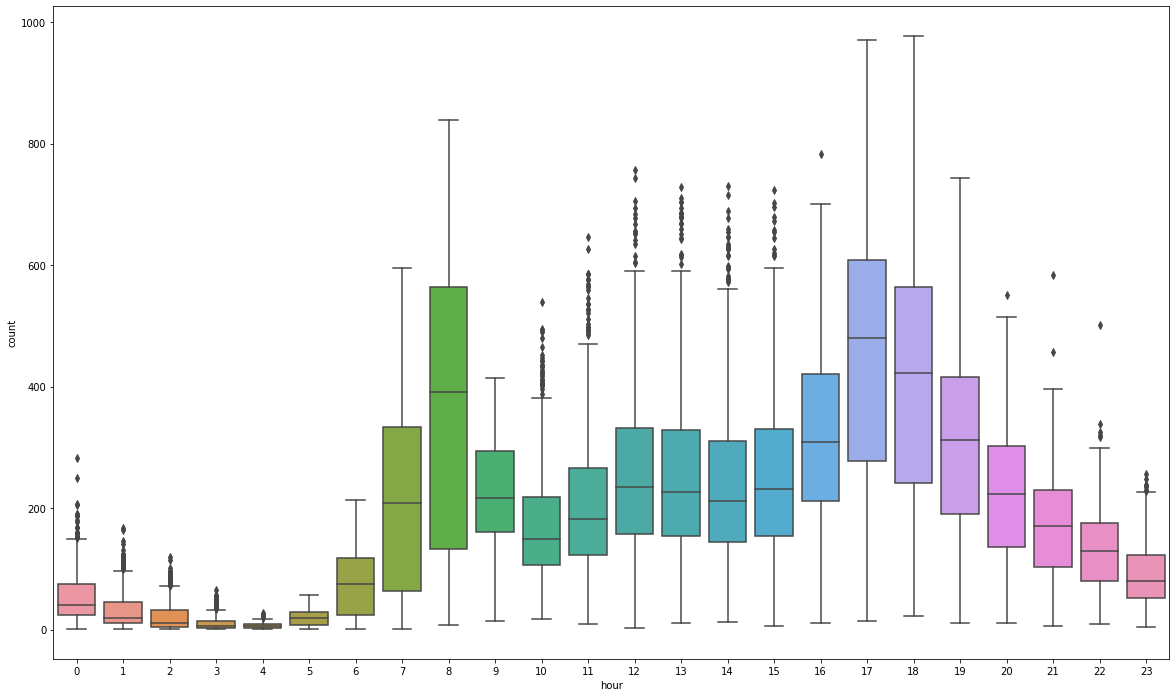

In [8]:
_, axes = plt.subplots(1, 1, figsize = (20,12))
sns.boxplot(x = train["hour"], y = train["count"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='windspeed', ylabel='count'>

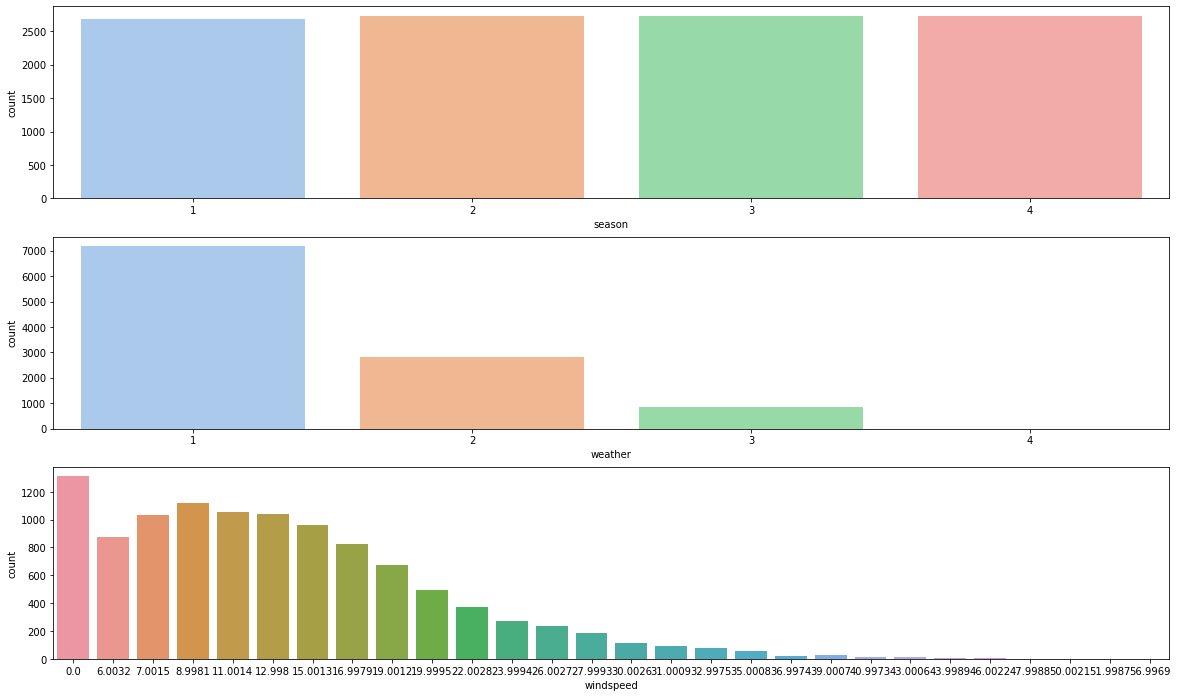

In [9]:
fig, axes = plt.subplots(3,1, figsize = (20,12))

sns.countplot(train["season"], ax = axes[0], palette = "pastel")
sns.countplot(train["weather"], ax = axes[1], palette = "pastel")
sns.countplot(train["windspeed"], ax = axes[2])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='count'>

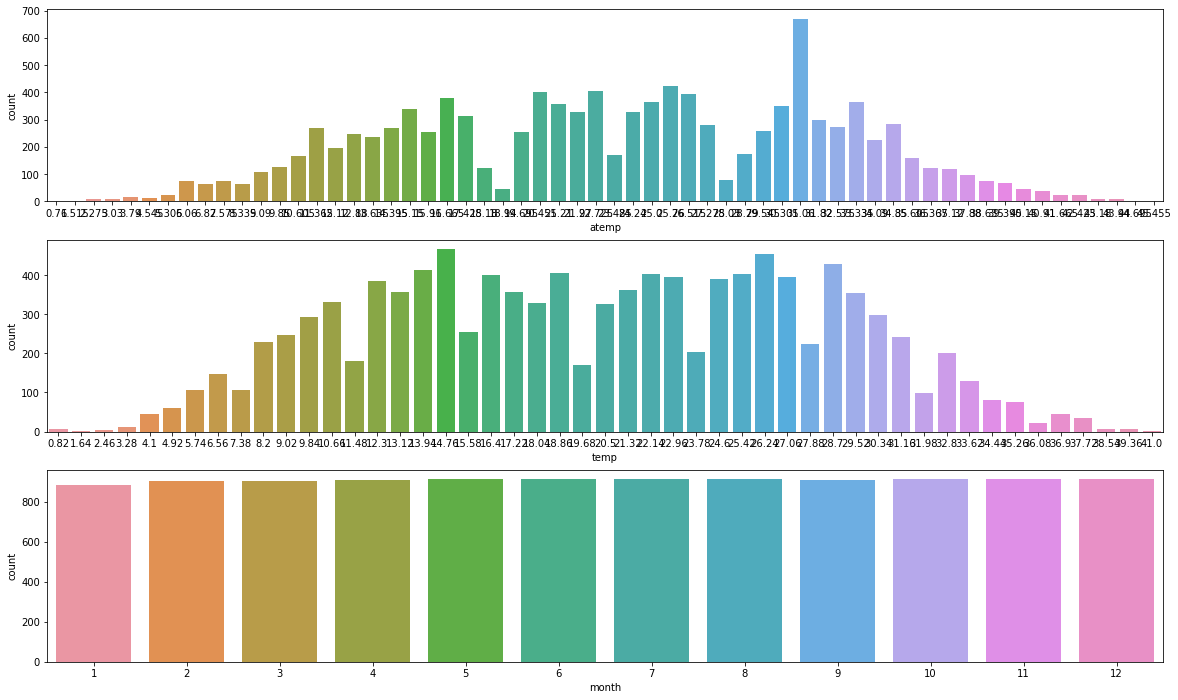

In [10]:
fig, axes = plt.subplots(3,1, figsize = (20,12))

sns.countplot(train["atemp"], ax = axes[0])
sns.countplot(train["temp"], ax = axes[1])
sns.countplot(train["month"], ax = axes[2])

In [11]:
X = pd.DataFrame(train.iloc[:, :-1].values)
y = train.iloc[:, -1].values

In [12]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,19,2,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,20,2,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.91,61,15.0013,4,164,2012,21,2,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,22,2,12


In [13]:
X.drop(0, inplace = True, axis = 1)       #0 -> datetime
X.drop(6, inplace = True, axis = 1)       #6 -> atemp
X.drop(8, inplace = True, axis = 1)       #8 -> windspeed
X.drop(9, inplace = True, axis = 1)       #9 -> casual
X.drop(10, inplace = True, axis = 1)      #10 -> registered
X.drop(14, inplace = True, axis = 1)      #14 -> month
X = X.to_numpy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# sc = StandardScaler()
# X_train[:, :] = sc.fit_transform(X_train[:, :])
# X_test[:, :] = sc.transform(X_test[:, :])

In [16]:
# Building  Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
#regressor.fit(X_train, y_train)
y_train_log = np.log1p(y_train)
regressor.fit(X_train, y_train_log)

RandomForestRegressor(n_estimators=500, random_state=0)

In [17]:
# Evaluating on Training set
# reg_pred_train = regressor.predict(X_train)

In [18]:
X_ans = pd.DataFrame(test.values)

In [19]:
X_ans.drop(8, inplace = True, axis = 1)     #windspeed
X_ans.drop(6, inplace = True, axis = 1)     #atemp
X_ans.drop(0, inplace = True, axis = 1)     #datetime
X_ans.drop(12, inplace = True, axis = 1)    #month
X_ans = X_ans.to_numpy()

In [20]:
reg_pred_test = regressor.predict(X_ans)

In [21]:
reg_pred_test = pd.DataFrame(reg_pred_test)

In [22]:
reg_pred_test.columns = ['count']

In [23]:
answer = pd.concat((test.iloc[:, 0], np.exp(pd.DataFrame(reg_pred_test))), axis = 1)

In [24]:
answer

,datetime,count
0,2011-01-20 00:00:00,14.121745
1,2011-01-20 01:00:00,5.370473
2,2011-01-20 02:00:00,3.800311
3,2011-01-20 03:00:00,4.634092
4,2011-01-20 04:00:00,3.694105
...,...,...
6488,2012-12-31 19:00:00,197.909900
6489,2012-12-31 20:00:00,156.338657
6490,2012-12-31 21:00:00,104.997597
6491,2012-12-31 22:00:00,96.438808


In [25]:
answer.to_csv('submission.csv', index = False)